In [1]:
import tensorflow as tf

C:\Users\eiser\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\eiser\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\eiser\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\eiser\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [4]:
from keras import optimizers 

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
chemin_d_acces= '/Users/eiser/Desktop/data/HCP_SYS866_2020/HCP_SYS866_2020/'

In [7]:
import numpy as np

In [10]:
#x=np.load(chemin_d_acces+'img100019_T1w.png')

ValueError: Cannot load file containing pickled data when allow_pickle=False

In [11]:
i=4
'cat.{}.jpg'.format(i)


'cat.4.jpg'

In [13]:
import os, shutil 

original_dataset_dir= '/Users/eiser/Desktop/data/HCP_SYS866_2020/HCP_SYS866_2020/'

base_dir='/Users/eiser/Desktop/cerveau'
os.mkdir(base_dir)

In [14]:
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)

validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [15]:
train_homme_dir=os.path.join(train_dir,'homme')
os.mkdir(train_homme_dir)

train_femme_dir = os.path.join(train_dir, 'femme')
os.mkdir(train_femme_dir)

validation_homme_dir = os.path.join(validation_dir,'homme')
os.mkdir(validation_homme_dir)

validation_femme_dir = os.path.join(validation_dir,'femme')
os.mkdir(validation_femme_dir)

test_homme_dir = os.path.join(test_dir,'homme')
os.mkdir(test_homme_dir)

test_femme_dir = os.path.join(test_dir,'femme')
os.mkdir(test_femme_dir)


In [87]:
file= open('/Users/eiser/Desktop/saluts.txt','r')

ligne= file.readlines()




In [88]:
nom=[]
sexe=[]


for i in range (2,len(ligne)):
    
    li=str(ligne[i]).rstrip('\n')
    liste=li.split(',')
    nom.append(liste[0])
    sexe.append(liste[8])
    
print(len(nom))
print(len(sexe))

1201
1201


In [89]:
file.close()

In [93]:

    
    
for i in range(800):
    fname='img'+nom[i]+'_T1w.png'
    src= os.path.join(original_dataset_dir, fname)
    if os.path.isfile(src)==True:
        if sexe[i]=='1':
            src= os.path.join(original_dataset_dir, fname)
            dst=os.path.join(train_homme_dir, fname)
            shutil.copyfile(src, dst)
        else:
            src= os.path.join(original_dataset_dir, fname)
            dst=os.path.join(train_femme_dir, fname)
            shutil.copyfile(src, dst)
    
        

In [94]:
for i in range(800,960):
    fname='img'+nom[i]+'_T1w.png'
    src= os.path.join(original_dataset_dir, fname)
    if os.path.isfile(src)==True:
        if sexe[i]=='1':
            src= os.path.join(original_dataset_dir, fname)
            dst=os.path.join(validation_homme_dir, fname)
            shutil.copyfile(src, dst)
        else:
            src= os.path.join(original_dataset_dir, fname)
            dst=os.path.join(validation_femme_dir, fname)
            shutil.copyfile(src, dst)
    

In [95]:
for i in range(960,1200):
    fname='img'+nom[i]+'_T1w.png'
    src= os.path.join(original_dataset_dir, fname)
    if os.path.isfile(src)==True:
        if sexe[i]=='1':
            src= os.path.join(original_dataset_dir, fname)
            dst=os.path.join(test_homme_dir, fname)
            shutil.copyfile(src, dst)
        else:
            src= os.path.join(original_dataset_dir, fname)
            dst=os.path.join(test_femme_dir, fname)
            shutil.copyfile(src, dst)
    

In [96]:
from keras.preprocessing.image import ImageDataGenerator

In [97]:
train_datagen= ImageDataGenerator(rescale=1./255)
test_datagen= ImageDataGenerator(rescale=1./255)


train_generator= train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size= 20, class_mode='binary')

validation_generator= test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 665 images belonging to 2 classes.
Found 141 images belonging to 2 classes.


In [98]:
history= model.fit_generator(train_generator,steps_per_epoch=100, epochs=30,
                             validation_data=validation_generator, validation_steps=50)


Epoch 1/30
100/100 [==============================] - 48s 481ms/step - loss: 0.4557 - acc: 0.7847 - val_loss: 0.2116 - val_acc: 0.8025
Epoch 2/30
100/100 [==============================] - 48s 479ms/step - loss: 0.2835 - acc: 0.8895 - val_loss: 0.2367 - val_acc: 0.9458
Epoch 3/30
100/100 [==============================] - 48s 483ms/step - loss: 0.2228 - acc: 0.9081 - val_loss: 0.1089 - val_acc: 0.9673
Epoch 4/30
100/100 [==============================] - 48s 479ms/step - loss: 0.1669 - acc: 0.9325 - val_loss: 0.0010 - val_acc: 0.8212
Epoch 5/30
100/100 [==============================] - 48s 482ms/step - loss: 0.1255 - acc: 0.9503 - val_loss: 0.0361 - val_acc: 0.9865
Epoch 6/30
100/100 [==============================] - 51s 506ms/step - loss: 0.0825 - acc: 0.9711 - val_loss: 0.1493 - val_acc: 0.9774
Epoch 7/30
100/100 [==============================] - 51s 512ms/step - loss: 0.0703 - acc: 0.9731 - val_loss: 0.1052 - val_acc: 0.9718
Epoch 8/30
100/100 [==============================] - 

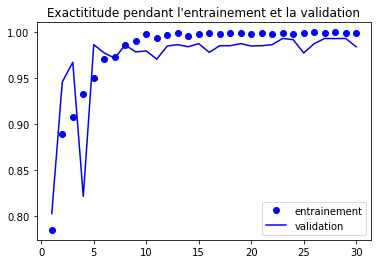

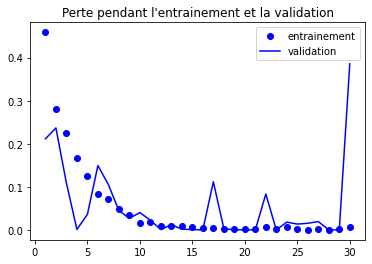

In [101]:
import matplotlib.pyplot as plt

acc= history.history['acc']
val_acc = history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='entrainement')
plt.plot(epochs, val_acc,'b', label='validation')
plt.title('Exactititude pendant l\'entrainement et la validation')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='entrainement')
plt.plot(epochs, val_loss, 'b', label='validation')
plt.title('Perte pendant l\'entrainement et la validation')
plt.legend()
plt.show()

In [102]:
test_generator= test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size= 20, class_mode='binary')



Found 203 images belonging to 2 classes.


In [103]:
test_loss, test_acc= model.evaluate_generator(test_generator, steps=50)

In [104]:
print(test_loss, test_acc)

0.371433824300766 0.9603004455566406
